# Analisis investigasi features yang berpengaruh terhadap nilai Miles per gallon
#### Benedict Aryo
Dataset note from UCI : This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition. 

Study case ini bertujuan untuk membuat analisis dan pemodelan regresi dengan variabel mpg (Miles per Gallon) bertindak sebagai variabel dependen (Y) dan variabel lainnya bertindak sebagai variabel independen (X). Berikut ini deskripsi variabel dalam dataset :

|column label |explanation|
-----|-----------------|
|mpg |Miles/(US) gallon|
|cyl |Number of cylinders|
|disp|Displacement (cu.in.)|
|hp  |Gross horsepower|
|drat |Rear axle ratio|
|wt |Weight (1000 lbs)|
|qsec| 1/4 mile time|
|vs |V/S|
|am |Transmission (0 = automatic, 1 = manual)|
|gear |Number of forward gears|
|carb |Number of carburetors|

## Import Library and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
print(df.shape)
df.head()

(32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Exploratory Data Analysis
Eksplorasi feature-feature yg terdapat pada dataset. <br>
Tujuannya ialah untuk mendapatkan gambaran umum mengenai karakteristik dataset, khususnya untuk menentukan pengaruh feature terhadap variabel 'mpg' atau Miles per Gallon yang akan menjadi topik utama pada study case ini.

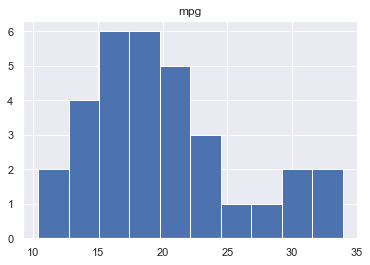

In [3]:
df.hist(column='mpg');

In [4]:
dt=df.sort_values('mpg',ascending=False)
dt.head()
dt

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


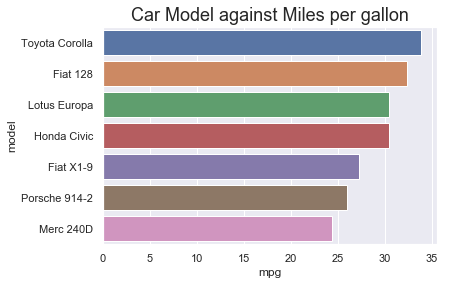

In [5]:
df_top7 = df.sort_values('mpg',ascending=False).head(7)
sns.barplot(x='mpg',y='model',data=df_top7).set_title('Car Model against Miles per gallon',fontsize=18);

In [6]:
# Menambahkan semua model Toyota
df_toyota = df[df['model'].str.contains('Toyota')]
df_toyota

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


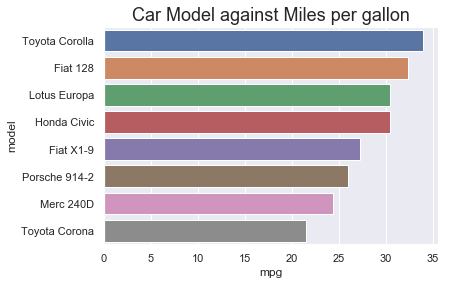

In [7]:
df_top8 = df_top7.append(df_toyota).drop_duplicates().sort_values('mpg',ascending=False)
sns.barplot(x='mpg',y='model',data=df_top8).set_title('Car Model against Miles per gallon',fontsize=18);

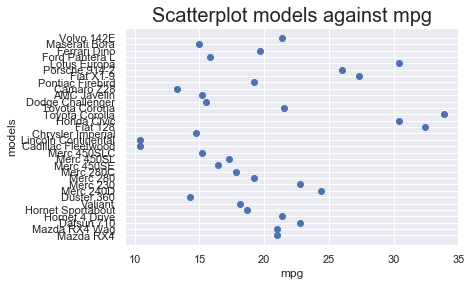

In [8]:
# Cek korelasi dengan scatterplot
plt.scatter(x=df['mpg'],y=df['model'])
plt.title('Scatterplot models against mpg',size=20)
plt.xlabel('mpg')
plt.ylabel('models');

Diketahui bahwa mobil dengan mpg tertinggi adalah __Toyota Corolla__. Namun, apabila kita filter model dengan merk Toyota, ternyata __tidak semua merk Toyota memiliki nilai miles per gallon yang tinggi__. Justru pada mpg merk __Fiat__ dinilai cukup konsisten karena memiliki 2 model yang memiliki __nilai mpg berdekatan pada urutan top 8 besar berdasarkan mpg__. Bahkan, pada scatterplot, kita dapat melihat bahwa tidak terdapat korelasi antara model terhadap mpg.<br>
Sehingga informasi tersebut belum menjawab pertanyaan utama yakni feature apa saja yg paling berpengaruh terhadap nilai dari mpg.

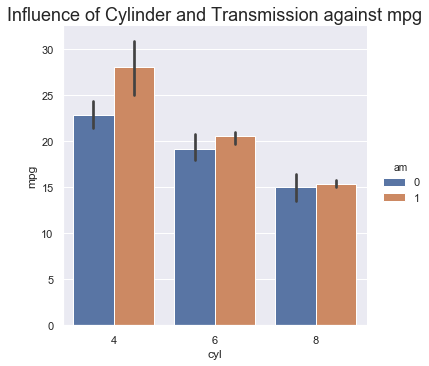

In [9]:
sns.catplot(kind='bar',data=df,y='mpg',x='cyl',hue='am');
plt.title('Influence of Cylinder and Transmission against mpg',fontsize=18);

Berdasarkan grafik di atas, dapat kita ketahui secara umum bahwa nilai mpg tertinggi didapatkan oleh model dengan jumlah cylinder = 4 dan transmisi Manual (am = 1). untuk memastikan apakah variable tersebut sangat berpengaruh terhadap niai mpg, maka diperlukan data observasi data secara kuantitatif lebih lanjut. 

## Data Observation
Sesuai hasil Eksplorasi data sebelumnya, feature / kolom __'model'__ tidak memengaruhi variabel __'mpg'__. maka analisis selanjutnya tidak memerlukan feature kolom model.

In [10]:
# drop model
df = df.drop(columns='model')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Correlation Observation
Menampilkan nilai Pearson Correlation pada setiap features melalui tabel korelasi dan visualisasi.

In [11]:
corr = df.corr()
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


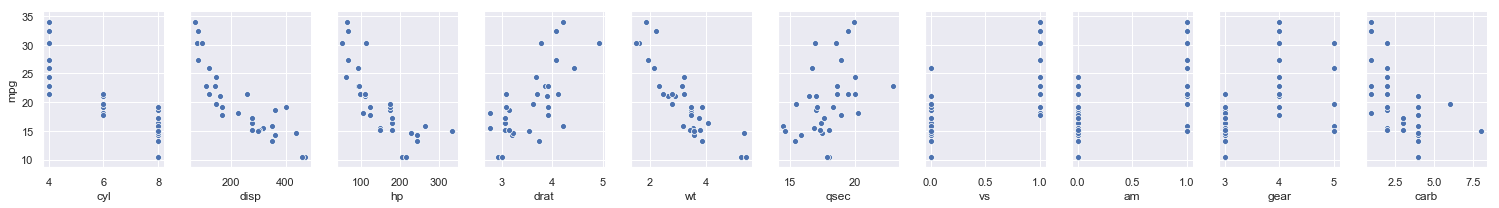

In [12]:
sns.pairplot(df, x_vars=df.columns.drop('mpg'), y_vars='mpg',size=3, aspect=0.7);

### Correlation Series Rangking
Menampilkan rangking nilai korelasi tertinggi dengan fungsi absolute (tidak memerdulikan korelasi positif atau negatif)

In [13]:
corr_ser = abs(pd.Series(corr['mpg']))
corr_ser.sort_values(ascending=False)

mpg     1.000000
wt      0.867659
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
vs      0.664039
am      0.599832
carb    0.550925
gear    0.480285
qsec    0.418684
Name: mpg, dtype: float64

Didapatkan nilai yang berpengaruh terhadap __mpg__ berturut - turut adalah __wt, cyl, disp, hp__ dan __drat__. 

## Regression Model
Pada salah satu _rule of thumb_ ilmu statistika, terdapat rule _one in ten_, yakni banyaknya variabel independen setara dengan satu per sepuluh dari banyaknya observasi.
Dengan demikian, pada kasus ini, dengan nilai observasi sebanyak 32 (jumlah baris pada dataset) dan jumlah variable sebanyak 12 (jumlah kolom pada dataset), maka digunakan feature untuk pemodelan regresi sebanyak 3 variable berdasarkan nilai korelasi tertinggi.
<br> sumber : https://en.wikipedia.org/wiki/One_in_ten_rule
#### Import model library

In [14]:
from sklearn.linear_model import LinearRegression
regresi = LinearRegression()

#### Dataset preparation for fitting model

In [15]:
# Create Array from dataset
X = df.drop(columns=['mpg','vs','qsec','am','gear','carb','hp','drat']).values
y = df['mpg'].values

# Split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

#### Fitting Model and R2 Score Accuracy check

In [16]:
regresi.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("R2 Score for Linear model : ",regresi.score(X_test,y_test))

R2 Score for Linear model :  0.7617881566035477
